## Welcome
This is a quick tutorial of how you can use existing LLMs to perform precise sentiment analysis on sample data.

**Created By: Chen Wenlong**

**Date: 6 March 2024**

## Quick Start

Before we begin, since we will be using the imdb dataset from [huggingface](https://huggingface.co/datasets/imdb), we first need to install the datasets library using pip. We will also need to install some dependencies: transformers to tokenise our text, torch to handle our tensors, scipy (softmark) to normalise the probabilities the sentiment scores and pandas to manipulate our dataframes.

In [33]:
%pip install datasets transformers torch pandas scipy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


To simulate the model, I have copied over some sample data from the imdb dataset (top 5 and bottom 5), the first 5 are negative comments while the last 5 are positive comments. You can skip this if you want to access the full dataset below.

In [81]:
import pandas as pd

neg_data = [{"text":"I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered \"controversial\" I really had to see this for myself.<br \/><br \/>The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br \/><br \/>What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, even then it's not shot like some cheaply made porno. While my countrymen mind find it shocking, in reality sex and nudity are a major staple in Swedish cinema. Even Ingmar Bergman, arguably their answer to good old boy John Ford, had sex scenes in his films.<br \/><br \/>I do commend the filmmakers for the fact that any sex shown in the film is shown for artistic purposes rather than just to shock people and make money to be shown in pornographic theaters in America. I AM CURIOUS-YELLOW is a good film for anyone wanting to study the meat and potatoes (no pun intended) of Swedish cinema. But really, this film doesn't have much of a plot.","label":0},
{"text":"\"I Am Curious: Yellow\" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies like The Brown Bunny, in which we're treated to the site of Vincent Gallo's throbbing johnson, but not a trace of pink visible on Chloe Sevigny. Before crying (or implying) \"double-standard\" in matters of nudity, the mentally obtuse should take into account one unavoidably obvious anatomical difference between men and women: there are no genitals on display when actresses appears nude, and the same cannot be said for a man. In fact, you generally won't see female genitals in an American film in anything short of porn or explicit erotica. This alleged double-standard is less a double standard than an admittedly depressing ability to come to terms culturally with the insides of women's bodies.","label":0},
{"text":"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br \/><br \/>One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br \/><br \/>One might better spend one's time staring out a window at a tree growing.<br \/><br \/>","label":0},
{"text":"This film was probably inspired by Godard's Masculin, f\u00e9minin and I urge you to see that film instead.<br \/><br \/>The film has two strong elements and those are, (1) the realistic acting (2) the impressive, undeservedly good, photo. Apart from that, what strikes me most is the endless stream of silliness. Lena Nyman has to be most annoying actress in the world. She acts so stupid and with all the nudity in this film,...it's unattractive. Comparing to Godard's film, intellectuality has been replaced with stupidity. Without going too far on this subject, I would say that follows from the difference in ideals between the French and the Swedish society.<br \/><br \/>A movie of its time, and place. 2\/10.","label":0},
{"text":"Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that old Peggy Lee song..<br \/><br \/>\"Is that all there is??\" ...I was just an early teen when this smoked fish hit the U.S. I was too young to get in the theater (although I did manage to sneak into \"Goodbye Columbus\"). Then a screening at a local film museum beckoned - Finally I could see this film, except now I was as old as my parents were when they schlepped to see it!!<br \/><br \/>The ONLY reason this film was not condemned to the anonymous sands of time was because of the obscenity case sparked by its U.S. release. MILLIONS of people flocked to this stinker, thinking they were going to see a sex film...Instead, they got lots of closeups of gnarly, repulsive Swedes, on-street interviews in bland shopping malls, asinie political pretension...and feeble who-cares simulated sex scenes with saggy, pale actors.<br \/><br \/>Cultural icon, holy grail, historic artifact..whatever this thing was, shred it, burn it, then stuff the ashes in a lead box!<br \/><br \/>Elite esthetes still scrape to find value in its boring pseudo revolutionary political spewings..But if it weren't for the censorship scandal, it would have been ignored, then forgotten.<br \/><br \/>Instead, the \"I Am Blank, Blank\" rhythymed title was repeated endlessly for years as a titilation for porno films (I am Curious, Lavender - for gay films, I Am Curious, Black - for blaxploitation films, etc..) and every ten years or so the thing rises from the dead, to be viewed by a new generation of suckers who want to see that \"naughty sex film\" that \"revolutionized the film industry\"...<br \/><br \/>Yeesh, avoid like the plague..Or if you MUST see it - rent the video and fast forward to the \"dirty\" parts, just to get it over with.<br \/><br \/>","label":0}]

pos_data = [{"text":"A hit at the time but now better categorised as an Australian cult film. The humour is broad, unsubtle and, in the final scene where a BBC studio fire is extinguished by urinating on it, crude. Contains just about every cliche about the traditional Australian pilgrimage to 'the old country', and every cliche about those rapacious, stuck up, whinging, Tory Brits. Would be acceptable to the British because of its strong cast of well known actors, and to Australians of that generation, who can 'get' the humour. Americans -- forget it. The language and jokes are in the Australian dialect of English and as such will be unintelligible.","label":1},
{"text":"I love this movie like no other. Another time I will try to explain its virtues to the uninitiated, but for the moment let me quote a few of pieces the remarkable dialogue, which, please remember, is all tongue in cheek. Aussies and Poms will understand, everyone else-well?<br \/><br \/>(title song lyric)\"he can sink a beer, he can pick a queer, in his latest double-breasted Bondi gear.\"<br \/><br \/>(another song lyric) \"All pommies are bastards, bastards, or worse, and England is the a**e-hole of the universe.\"<br \/><br \/>(during a television interview on an \"arty program\"): Mr Mackenzie what artists have impressed you most since you've been in England? (Barry's response)Flamin' bull-artists!<br \/><br \/>(while chatting up a naive young pom girl): Mr Mackenzie, I suppose you have hordes of Aboriginal servants back in Australia? (Barry's response) Abos? I've never seen an Abo in me life. Mum does most of the solid yacca (ie hard work) round our place.<br \/><br \/>This is just a taste of the hilarious farce of this bonser Aussie flick. If you can get a copy of it, watch and enjoy.","label":1},
{"text":"This film and it's sequel Barry Mckenzie holds his own, are the two greatest comedies to ever be produced. A great story a young Aussie bloke travels to england to claim his inheritance and meets up with his mates, who are just as loveable and innocent as he is.<br \/><br \/>It's chock a block full of great, sayings , where else could you find someone who needs a drink so bad that he's as dry as a dead dingoes donger? great characters, top acting, and it's got great sheilas and more Fosters consumption then any other three films put together. Top notch.<br \/><br \/>And some of the funniest songs you'll ever hear, and it's full of great celebrities. Definitely my two favourite films of all time, I watch them at least once a fortnight.","label":1},
{"text":"'The Adventures Of Barry McKenzie' started life as a satirical comic strip in 'Private Eye', written by Barry Humphries and based on an idea by Peter Cook. McKenzie ( 'Bazza' to his friends ) is a lanky, loud, hat-wearing Australian whose two main interests in life are sex ( despite never having had any ) and Fosters lager. In 1972, he found his way to the big screen for the first of two outings. It must have been tempting for Humphries to cast himself as 'Bazza', but he wisely left the job to Barry Crocker ( later to sing the theme to the television soap opera 'Neighbours'! ). Humphries instead played multiple roles in true Peter Sellers fashion, most notably Bazza's overbearing Aunt 'Edna Everage' ( this was before she became a Dame ).<br \/><br \/>You know this is not going to be 'The Importance Of Being Ernest' when its censorship classification N.P.A. stands for 'No Poofters Allowed'. Pom-hating Bazza is told by a Sydney solicitor that in order to inherit a share in his father's will he must go to England to absorb British culture. With Aunt Edna in tow, he catches a Quantas flight to Hong Kong, and then on to London. An over-efficient customs officer makes Bazza pay import duties on everything he bought over there, including a suitcase full of 'tubes of Fosters lager'. As he puts it: \"when it comes to fleecing you, the Poms have got the edge on the gyppos!\". A crafty taxi driver ( Bernard Spear ) maximises the fare by taking Bazza and Edna first to Stonehenge, then Scotland. The streets of London are filthy, and their hotel is a hovel run by a seedy landlord ( Spike Milligan ) who makes Bazza put pound notes in the electricity meter every twenty minutes. There is some good news for our hero though; he meets up with other Aussies in Earls Court, and Fosters is on sale in British pubs.<br \/><br \/>What happens next is a series of comical escapades that take Bazza from starring in his own cigarette commercial, putting curry down his pants in the belief it is some form of aphrodisiac, a bizarre encounter with Dennis Price as an upper-class pervert who loves being spanked while wearing a schoolboy's uniform, a Young Conservative dance in Rickmansworth to a charity rock concert where his song about 'chundering' ( vomiting ) almost makes him an international star, and finally to the B.B.C. T.V. Centre where he pulls his pants down on a live talk-show hosted by the thinking man's crumpet herself, Joan Bakewell. A fire breaks out, and Bazza's friends come to the rescue - downing cans of Fosters, they urinate on the flames en masse.<br \/><br \/>This is a far cry from Bruce Beresford's later works - 'Breaker Morant' and 'Driving Miss Daisy'. On release, it was savaged by critics for being too 'vulgar'. Well, yes, it is, but it is also great non-P.C. fun. 'Bazza' is a disgusting creation, but his zest for life is unmistakable, you cannot help but like the guy. His various euphemisms for urinating ( 'point Percy at the porcelain' ) and vomiting ( 'the Technicolour yawn' ) have passed into the English language without a lot of people knowing where they came from. Other guest stars include Dick Bentley ( as a detective who chases Bazza everywhere ), Peter Cook, Julie Covington ( later to star in 'Rock Follies' ), and even future arts presenter Russell Davies.<br \/><br \/>A sequel - the wonderfully-named 'Barry McKenzie Holds His Own - came out two years later. At its premiere, Humphries took the opportunity to blast the critics who had savaged the first film. Good for him.<br \/><br \/>What must have been of greater concern to him, though, was the release of 'Crocodile Dundee' in 1985. It also featured a lanky, hat-wearing Aussie struggling to come to terms with a foreign culture. And made tonnes more money.<br \/><br \/>The song on the end credits ( performed by Snacka Fitzgibbon ) is magnificent. You have a love a lyric that includes the line: \"If you want to send your sister in a frenzy, introduce her to Barry McKenzie!\". Time to end this review. I have to go the dunny to shake hands with the unemployed...","label":1},
{"text":"The story centers around Barry McKenzie who must go to England if he wishes to claim his inheritance. Being about the grossest Aussie shearer ever to set foot outside this great Nation of ours there is something of a culture clash and much fun and games ensue. The songs of Barry McKenzie(Barry Crocker) are highlights.","label":1}]

data = neg_data + pos_data

df = pd.DataFrame(data)
df.head()

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


After we have downloaded the datasets library, we will import the imdb dataset into our local environment and load in into a `dataset` variable. The dataset is large and has 25000 entires, so it might take slightly longer to load.

In [79]:
from datasets import load_dataset
import pandas as pd

# Load the IMDb dataset, only the train split
dataset = load_dataset("imdb", split="train")

Here, we can see how many data points we want to run through for sentiment analysis. 

Edit the `datapoints` variable to set the number of datapoints you want to run through!

In [121]:
datapoints = 100

# take from the first 50 (negative) and the last 50 (positive) examples
df = pd.concat([pd.DataFrame(dataset[:int(datapoints/2)]), pd.DataFrame(dataset[-int(datapoints/2):])])

# Reset the index
df = df.reset_index(drop=True)
df

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
95,A hit at the time but now better categorised a...,1
96,I love this movie like no other. Another time ...,1
97,This film and it's sequel Barry Mckenzie holds...,1
98,'The Adventures Of Barry McKenzie' started lif...,1


Let us now instantiate the tokenizer and model. This may take a minute or more because we are instantiating the model, and downloading 500MB of model data.

In [36]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_tr = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model_tr = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Now, we will create a method that will be used to parse each text (tokens) through to retrieve the sentiment analysis results.

In [89]:
from scipy.special import softmax

def sentiment_score(review):
    tokens = tokenizer_tr.encode(review, return_tensors='pt') # encode the review, return_tensors='pt' returns pytorch tensors
    result = model_tr(tokens)
    score = result[0][0].detach().numpy()
    score = softmax(score)
    scores_dict = {
        "negative": score[0].item(),
        "neutral": score[1].item(),
        "positive": score[2].item()
    }
    return scores_dict

Now, we iterate through the dataset and return the sentiment scores. I placed checks here to ensure we know which lines are not fully parsed due to exceeding token count and handle the exception accordingly.

Uncomment the last line to see how many rows did not parse fully due to token limit exceeded.

In [112]:
from tqdm import tqdm

count = 0 # counter of number of rows that did not parse fully
rows_skipped = [] # list of errors

for i, row in tqdm(df.iterrows(), total=len(df)): # tqdm helps us track the progress of the loop via a progress bar
    try:
        df.at[i, 'full_sentiment_tr'] = sentiment_score(row['text'])
    except RuntimeError as e: # catch error, likely to be because the string is too long.
        df.at[i, 'full_sentiment_tr'] = sentiment_score(row['text'][:512]) 
        count+=1
        rows_skipped.append(i)
    finally:
        df.at[i, 'sentiment_tr']= max(df.at[i, 'full_sentiment_tr'], key=df.at[i, 'full_sentiment_tr'].get)

df # prints out the df

# Print the number of rows that did not parse fully
# print(count, "rows did not parse fully")
# print("Rows skipped:", rows_skipped) # print the rows that did not parse fully

# Concise way to do the same thing using native pandas methods (note for self)
# df['full_sentiment_tr'] = df['text'].apply(lambda x: sentiment_score(x[:512]))
# df['highest_tr']= df['full_sentiment_tr'].apply(lambda x: max(x, key=x.get))

100%|██████████| 100/100 [00:23<00:00,  4.22it/s]


,text,label,full_sentiment_tr,sentiment_tr
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,"{'negative': 0.22540923953056335, 'neutral': 0...",neutral
1,"""I Am Curious: Yellow"" is a risible and preten...",0,"{'negative': 0.8006215691566467, 'neutral': 0....",negative
2,If only to avoid making this type of film in t...,0,"{'negative': 0.786929726600647, 'neutral': 0.1...",negative
3,This film was probably inspired by Godard's Ma...,0,"{'negative': 0.5808144807815552, 'neutral': 0....",negative
4,"Oh, brother...after hearing about this ridicul...",0,"{'negative': 0.7292711734771729, 'neutral': 0....",negative
...,...,...,...,...
95,A hit at the time but now better categorised a...,1,"{'negative': 0.5477031469345093, 'neutral': 0....",negative
96,I love this movie like no other. Another time ...,1,"{'negative': 0.014586865901947021, 'neutral': ...",positive
97,This film and it's sequel Barry Mckenzie holds...,1,"{'negative': 0.005622092168778181, 'neutral': ...",positive
98,'The Adventures Of Barry McKenzie' started lif...,1,"{'negative': 0.03124433569610119, 'neutral': 0...",neutral


Another interesting way to do this is via another form of rating on a scale of 1 to 5, similar to how an actual movie review is done.

First, we instantiate the bert multilingual model. This may take awhile.

In [52]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer_bm = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model_bm = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Then we define a new function to analyse the text, similar to the method structure from the previous method.

In [54]:
import torch

def sentiment_score_bm(review):
    tokens = tokenizer_bm.encode(review, return_tensors='pt') # encode the review, return_tensors='pt' returns pytorch tensors
    result = model_bm(tokens)
    return int(torch.argmax(result.logits))+1

We run this model and append the score to the dataframe. We will obtain the raw score and then create a new column where it will reflect neutral for `score == 3`, positive for `score > 3` and negative for `score < 3`.

Note that number of lines partially parsed can be different between the 2 methods because of the different tokenizer we are using for each respective model.

In [113]:
from tqdm import tqdm

count = 0 # counter of number of rows that did not parse fully
rows_skipped = []
for i, row in tqdm(df.iterrows(), total=len(df)): # tqdm helps us track the progress of the loop via a progress bar
    try:
        df.at[i, 'full_sentiment_bm'] = sentiment_score_bm(row['text'])
    except RuntimeError as e: # catch error, likely to be because the string is too long.
        df.at[i, 'full_sentiment_bm'] = sentiment_score_bm(row['text'][:512]) 
        count+=1
        rows_skipped.append(i)
    finally:
        df.at[i, 'sentiment_bm']= "positive" if df.at[i, 'full_sentiment_bm']>3 else "neutral" if df.at[i, 'full_sentiment_bm']==3 else "negative"

df

# Print the number of rows that did not parse fully
# print(count, "rows did not parse fully")
# print("Rows skipped:", rows_skipped) # print the rows that did not parse fully

# Concise way to do the same thing using native pandas methods (note for self)
# df['full_sentiment_bm'] = df['text'].apply(lambda x: sentiment_score_bm(x[:512])) # we limit the token size as per model restriction
# df['highest_bm'] = df['full_sentiment_bm'].apply(lambda x: "positive" if x==3 else "neutral" if x==2 else "negative")

100%|██████████| 100/100 [00:24<00:00,  4.02it/s]


,text,label,full_sentiment_tr,sentiment_tr,full_sentiment_bm,sentiment_bm
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,"{'negative': 0.22540923953056335, 'neutral': 0...",neutral,2.0,negative
1,"""I Am Curious: Yellow"" is a risible and preten...",0,"{'negative': 0.8006215691566467, 'neutral': 0....",negative,2.0,negative
2,If only to avoid making this type of film in t...,0,"{'negative': 0.786929726600647, 'neutral': 0.1...",negative,2.0,negative
3,This film was probably inspired by Godard's Ma...,0,"{'negative': 0.5808144807815552, 'neutral': 0....",negative,2.0,negative
4,"Oh, brother...after hearing about this ridicul...",0,"{'negative': 0.7292711734771729, 'neutral': 0....",negative,1.0,negative
...,...,...,...,...,...,...
95,A hit at the time but now better categorised a...,1,"{'negative': 0.5477031469345093, 'neutral': 0....",negative,2.0,negative
96,I love this movie like no other. Another time ...,1,"{'negative': 0.014586865901947021, 'neutral': ...",positive,5.0,positive
97,This film and it's sequel Barry Mckenzie holds...,1,"{'negative': 0.005622092168778181, 'neutral': ...",positive,5.0,positive
98,'The Adventures Of Barry McKenzie' started lif...,1,"{'negative': 0.03124433569610119, 'neutral': 0...",neutral,4.0,positive


** What is the accuracy and how do they compare? To find out the efficacy of each model, we will find the `accruacy`, `precision`, `recall` and `F1 score`. Below are fomulas to calculate each.

TP = True Positive, TN = True Negative, FP = False Positive, FN = False Negative.
**Accuracy:**
$$ \text{Accuracy} = \frac{TP + TN}{TP + FN + FP + TN} $$

**Precision (Positive Predictive Value):**
$$ \text{Precision} = \frac{TP}{TP + FP} $$

**Recall (Sensitivity, True Positive Rate):**
$$ \text{Recall} = \frac{TP}{TP + FN} $$

**F1 Score (Harmonic Mean of Precision and Recall):**
$$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$



In [114]:
# calculate true positive of the sentiment analysis compared to the label twitter roberta
true_positives = df.apply(lambda x: 1 if x['sentiment_tr'] == 'positive' and x['label'] == 1 else 0, axis=1).sum()
false_positives = df.apply(lambda x: 1 if x['sentiment_tr'] == 'positive' and x['label'] == 0 else 0, axis=1).sum()
true_negatives = df.apply(lambda x: 1 if x['sentiment_tr'] == 'negative' and x['label'] == 0 else 0, axis=1).sum()
false_negatives = df.apply(lambda x: 1 if x['sentiment_tr'] == 'negative' and x['label'] == 1 else 0, axis=1).sum()
# print(true_positives, false_positives, true_negatives, false_negatives)

accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

print("Twi1tter RoBERTa")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# calculate true positive of the sentiment analysis compared to the label for BERT
true_positives = df.apply(lambda x: 1 if x['sentiment_bm'] == 'positive' and x['label'] == 1 else 0, axis=1).sum()
false_positives = df.apply(lambda x: 1 if x['sentiment_bm'] == 'positive' and x['label'] == 0 else 0, axis=1).sum()
true_negatives = df.apply(lambda x: 1 if x['sentiment_bm'] == 'negative' and x['label'] == 0 else 0, axis=1).sum()
false_negatives = df.apply(lambda x: 1 if x['sentiment_bm'] == 'negative' and x['label'] == 1 else 0, axis=1).sum()
# print(true_positives, false_positives, true_negatives, false_negatives)

accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * (precision * recall) / (precision + recall)

print("BERT Multilingual")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



33 3 38 4
Twi1tter RoBERTa
Accuracy: 0.9102564102564102
Precision: 0.9166666666666666
Recall: 0.8918918918918919
F1 Score: 0.9041095890410958
38 1 43 4
BERT Multilingual
Accuracy: 0.9418604651162791
Precision: 0.9743589743589743
Recall: 0.9047619047619048
F1 Score: 0.9382716049382716


Now, we can create a heatmap to visualise the confusion matrix of the model.

We need to download more libraries.

In [ ]:
%pip install matplotlib seaborn scikit-learn

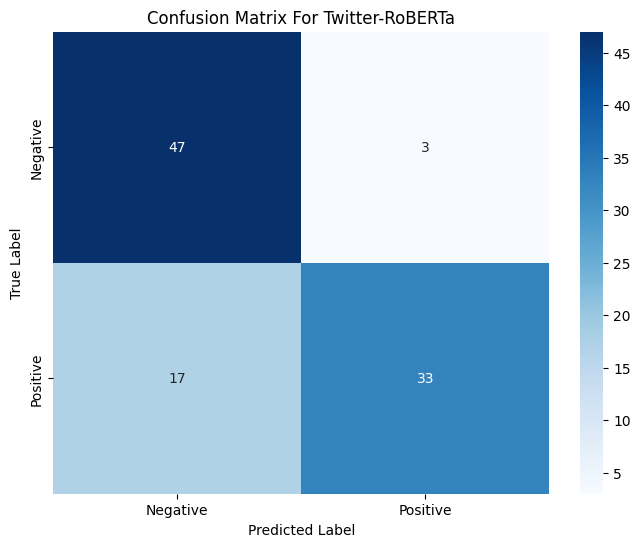

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'sentiment' to numerical values
df['predicted_label'] = df['sentiment_tr'].apply(lambda x: 1 if x == 'positive' else 0)

# Generate the confusion matrix
cm = confusion_matrix(df['label'], df['predicted_label'])

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix For Twitter-RoBERTa')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

Do the same for the BERT multilingual model.

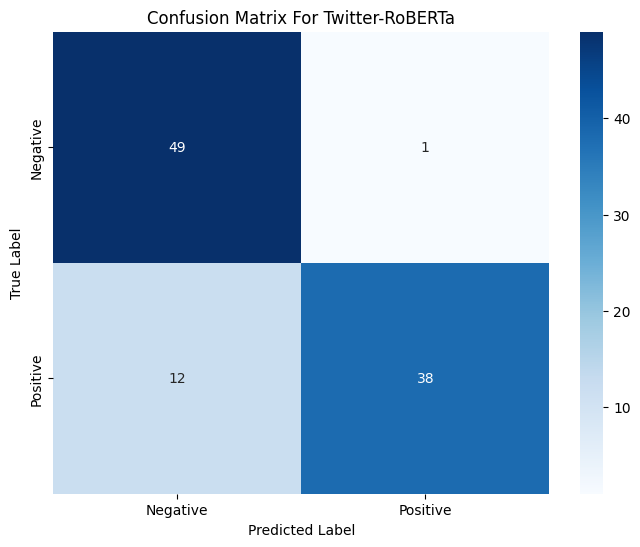

In [116]:

# Convert 'sentiment' to numerical values
df['predicted_label'] = df['sentiment_bm'].apply(lambda x: 1 if x == 'positive' else 0)

# Generate the confusion matrix
cm = confusion_matrix(df['label'], df['predicted_label'])

# Plotting the confusion matrix using Seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix For Twitter-RoBERTa')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])
plt.show()

## Final Thoughts

In general, both models performed very well in terms identifying negative comments, whereas positive comments are not as accurate. Although not significant, the BERT model did perform better than the twitter roberta model. I used the roberta model because it was the most downloaded model at the time of making this (48.3M downloads). That's pretty insane. However, the second model, with its rating system (out of 5), seemed more fitting for the specific task of analysing movie rating. 